## CDS4004 Tutorial 11
### Network Communities

<div class="alert alert-info">
    
Your name: Ng Ngai Fung

Your student ID: 4112150
    
</div>

Before we start, we can execute the cell below to load the libraries/modules that we need to use in this tutorial.

In [1]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import kernighan_lin_bisection, partition_quality, modularity
warnings.filterwarnings('ignore')

### Part 1 - Toy Example

In [2]:
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)

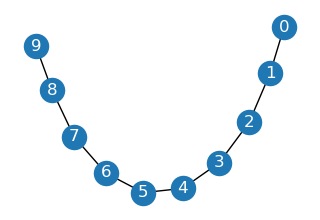

In [3]:
plt.figure(figsize=(3,2))
nx.draw(G, pos=pos, with_labels=True, font_color="white")

In [4]:
communities = girvan_newman(G)
print(list(communities))

[({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}), ({0, 1}, {2, 3, 4}, {5, 6, 7, 8, 9}), ({0, 1}, {2, 3, 4}, {5, 6}, {8, 9, 7}), ({0, 1}, {2}, {3, 4}, {5, 6}, {8, 9, 7}), ({0, 1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}), ({0}, {1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}), ({0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 9}), ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}), ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9})]


#### Task 1.1: Write a function to simulate the process of girvan_newman to find out all communities and compare your results with the cell above.

Hints: you can make use of the following functions

- nx.edge_betweenness_centrality(G) to compute edge betweenness of a graph 
- nx.remove_edge(i, j): to remove an edge between vertex i and j from the graph
- nx.connected_components(G)to discover all connected components
- tuple(nx.connected_components(G)) can convert all connected components in a tuple. e.g. ({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9})


In [28]:
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)


def my_girvan_newman(G):

    communities = []
    # print(len(G.edges()))
    for i in range(len(G.edges())):
        index = 0
        # print(nx.edge_betweenness_centrality(G))
        # print(max(nx.edge_betweenness_centrality(G).values()))
        for j in range(len(G.edges())):
            if max(nx.edge_betweenness_centrality(G).values()) == nx.edge_betweenness_centrality(G)[list(G.edges())[j]]:
                print(j)
                i_vertex = list(G.edges())[j][0]
                j_vertex = list(G.edges())[j][1]
                print(i_vertex, j_vertex)
                G.remove_edge(i_vertex, j_vertex)
                print(G.edges())
                communities.append(tuple(nx.connected_components(G)))
                break
            index += 1

    return communities

my_girvan_newman(G)

4
4 5
[(0, 1), (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8), (8, 9)]
1
1 2
[(0, 1), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8), (8, 9)]
4
6 7
[(0, 1), (2, 3), (3, 4), (5, 6), (7, 8), (8, 9)]
1
2 3
[(0, 1), (3, 4), (5, 6), (7, 8), (8, 9)]
3
7 8
[(0, 1), (3, 4), (5, 6), (8, 9)]
0
0 1
[(3, 4), (5, 6), (8, 9)]
0
3 4
[(5, 6), (8, 9)]
0
5 6
[(8, 9)]
0
8 9
[]


[({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9}),
 ({0, 1}, {2, 3, 4}, {5, 6, 7, 8, 9}),
 ({0, 1}, {2, 3, 4}, {5, 6}, {7, 8, 9}),
 ({0, 1}, {2}, {3, 4}, {5, 6}, {7, 8, 9}),
 ({0, 1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}),
 ({0}, {1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9}),
 ({0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 9}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}),
 ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9})]

#### Task 1.2: Next, we are going to visualize the communities in different colors

The idea is to assign the color to each vertex, we can construct a list of color_map to generate different colors for each vertex as follow: 
- `color_map.append(sns.color_palette()[0])` for orange
- `color_map.append(sns.color_palette()[1])` for blue
- `color_map.append(sns.color_palette()[2])` for green
- ...


Finally, we can put color_map as an argument to nx.draw:     
`nx.draw(G, node_color=color_map, with_labels=True, font_color="white", pos=pos)`

For this question, we would like to visualize the network in two communities, i.e. [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

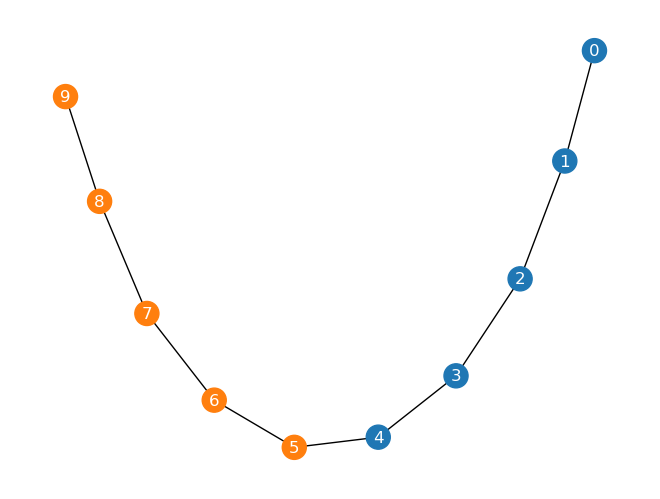

In [30]:
#Write your code here
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)
color_map = []
for node in G:
    if node < 5:
        color_map.append(sns.color_palette()[0])
    else:
        color_map.append(sns.color_palette()[1])
nx.draw(G, node_color=color_map, with_labels=True, font_color="white", pos=pos)

#### We can also make use of another algorithm `kernighan_lin_bisection(G)` to find out the communities. 

In [31]:
kernighan_lin_bisection(G)

({5, 6, 7, 8, 9}, {0, 1, 2, 3, 4})

#### Task 1.3: Repeat the same idea in Task 1.2, using kernighan_lin_bisection to visualize the network in two communities. 

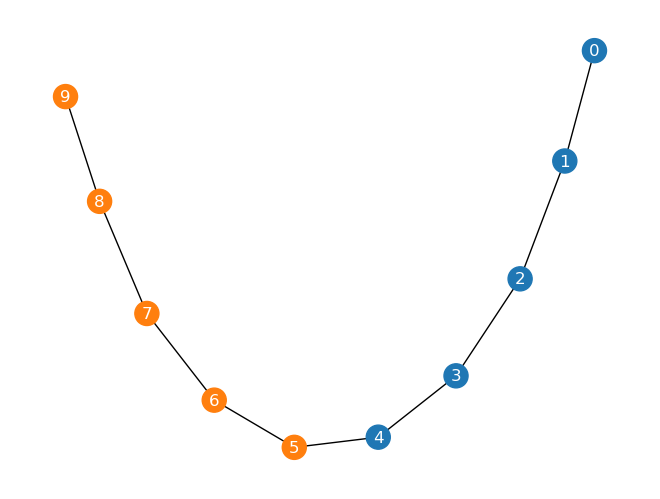

In [34]:
#Write your code here
communities = kernighan_lin_bisection(G)
color_map = []
for node in G:
    if node in communities[0]:
        color_map.append(sns.color_palette()[0])
    else:
        color_map.append(sns.color_palette()[1])
nx.draw(G, node_color=color_map, with_labels=True, font_color="white", pos=pos)

#### Task 1.4: Compare the performance between two algorithms 

Please make use of partition_quality() to get the coverage and performance of the detected communities to compare the performance between two algorithms. You need to report what the values of coverage and performance means in each algorithm and suggest which one is better. 

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html




In [35]:
#Write your code here
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)
communities = kernighan_lin_bisection(G)
partition_quality(G, communities)


(0.8888888888888888, 0.7111111111111111)

In [40]:
#Write your code here
G = nx.path_graph(10)
pos = nx.spring_layout(G, seed=3)
communities = girvan_newman(G).__next__()
partition_quality(G, communities)

(0.8888888888888888, 0.7111111111111111)

### Part 2 - A Real Network

More information could be found:

    https://en.wikipedia.org/wiki/Zachary%27s_karate_club
    https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

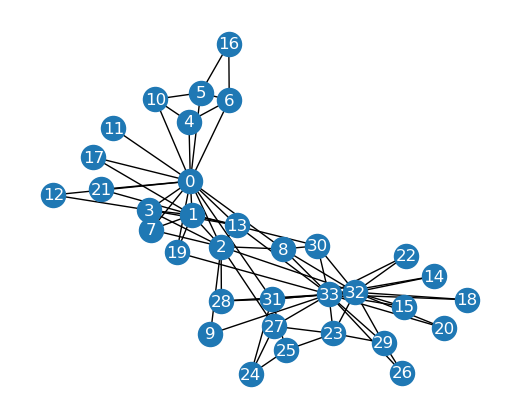

In [41]:
kcg = nx.karate_club_graph()
pos_kcg = nx.spring_layout(kcg,seed = 1)
plt.figure(figsize=(5,4))
nx.draw(kcg, pos=pos_kcg, with_labels=True, font_color="white")

#### Task 2.1:  Apply both algorithms to kcg and get the communities.

In [45]:
#Write your code here

comp = nx.community.girvan_newman(kcg)
communities_Girvan = tuple(sorted(c) for c in next(comp))
print(communities_Girvan)


([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


In [47]:
#Write your code here
communities_Kernighan = kernighan_lin_bisection(kcg)
print(communities_Kernighan)

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})


#### Task 2.2: Compare the performance between two algorithms
Besides partition_quality, please also use modularity to compare the performance.    
Ref: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html

In [52]:
#Write your code here - partition_quality of girvan_newman
partition_quality(kcg, communities_Girvan)

(0.8717948717948718, 0.6114081996434938)

In [53]:
#Write your code here - partition_quality of kernighan_lin_bisection
partition_quality(kcg, communities_Kernighan)

(0.8717948717948718, 0.6185383244206774)

In [50]:
#Write your code here - modularity of girvan_newman
modularity(kcg, communities_Girvan)

0.3476602762317048

In [51]:
#Write your code here - modularity of kernighan_lin_bisection
modularity(kcg, communities_Kernighan)

0.3998332115215232

#### Task 2.3: Find the best communities and draw it out

You can utilize the following for the 12-color scheme:

`sns.color_palette(n_colors=12)`

To iterate through these 12 colors, use `i` as follows: `sns.color_palette(n_colors=12)[i]`, where 
`i` ranges from 0 to 11.

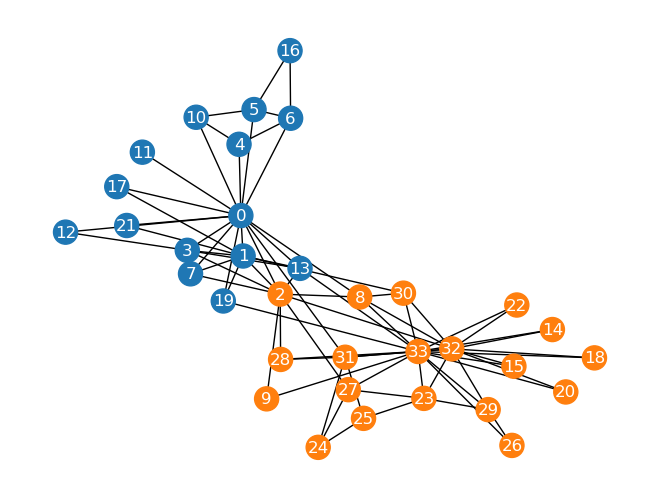

In [54]:
#Write your code here
color_map = []
for node in kcg:
    for community in communities_Girvan:
        if node in community:
            color_map.append(sns.color_palette(n_colors=12)[communities_Girvan.index(community)])
            break

nx.draw(kcg, node_color=color_map, with_labels=True, font_color="white", pos=pos_kcg)

### Part 3 - More communities

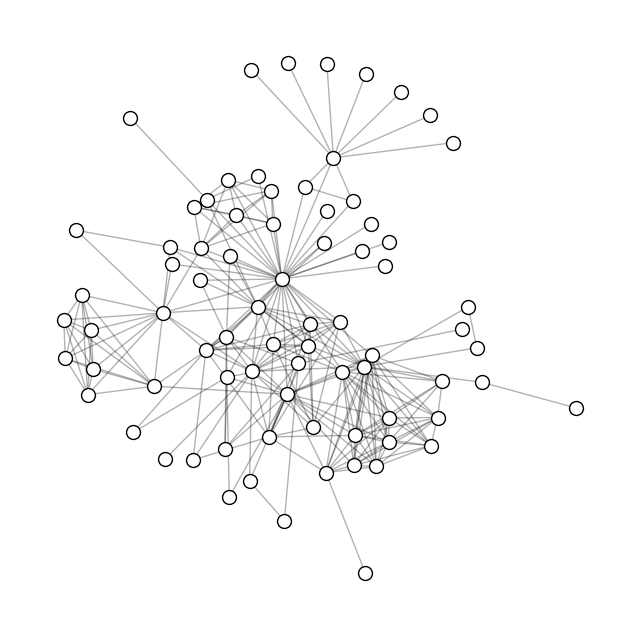

In [55]:
lesG = nx.Graph(nx.les_miserables_graph().edges)
lesG = nx.convert_node_labels_to_integers(lesG)
lespos = nx.kamada_kawai_layout(lesG)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(lesG, lespos, node_color='white', edgecolors='black', node_size=100)
nx.draw_networkx_edges(lesG, lespos, alpha=0.3)
plt.axis('off');

#### Task 3.1 Please determine the optimal number of communities, and draw it out. 
Hints: make use of girvan_newman algorithm and modularity 

In [61]:
#Write your code here - Find the communities
best = 0.0
comp = nx.community.girvan_newman(lesG)
for communities in comp:
    print(modularity(lesG, communities))
    if modularity(lesG, communities) > best:
        best = modularity(lesG, communities)
        best_communities = communities

print(best_communities)
print(modularity(lesG, best_communities))

0.07464039928079841
0.2604082708165416
0.2660502821005642
0.4154705809411618
0.4587156674313348
0.45545291090582174
0.4536626573253146
0.4518646537293074
0.4524226548453097
0.5380680761361523
0.5347820695641391
0.5314883129766259
0.5281868063736127
0.5248775497550995
0.5233585467170935
0.5195920391840784
0.5180420360840722
0.5151590303180607
0.5121287742575485
0.5027047554095109
0.4989304978609957
0.4955824911649823
0.49266848533697066
0.4888864777729555
0.4860964721929444
0.4823067146134292
0.4758277016554033
0.4720301940603881
0.4682249364498729
0.458762167524335
0.4549491598983198
0.4514461528923058
0.44758664517329033
0.44378913757827515
0.4399761299522599
0.42098859197718397
0.4050390600781202
0.3949717899435799
0.38000651001302
0.35942246884493767
0.35201345402690803
0.3481461962923926
0.3351261702523405
0.31349587699175396
0.2969418438836878
0.29326058652117304
0.28935457870915743
0.2715295430590861
0.25689751379502757
0.24592349184698367
0.23860747721495443
0.23494946989893978


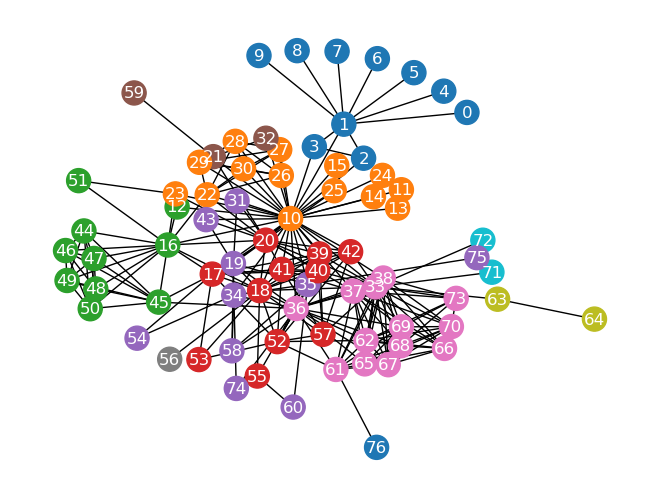

In [62]:
#Write your code here - Draw it out
number_of_colors = len(best_communities)
color_map = []
for node in lesG:
    for community in best_communities:
        if node in community:
            color_map.append(sns.color_palette(n_colors=12)[best_communities.index(community)])
            break

nx.draw(lesG, node_color=color_map, with_labels=True, font_color="white", pos=lespos)